In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [ ]:
# 1. Data Loading and Inspection
data = pd.read_csv('/content/drive/MyDrive/Data_set/ML project/diabetes.csv')
print("\nData info")
print(data.info())
print("\nData Description")
print(data.describe())


Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Data Description
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.

In [ ]:
print("Sample data")
data.head()

Sample data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data preprocessing

In [ ]:
# Replace 0's in certain columns with NaN to later impute with median
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_to_replace] = data[cols_to_replace].replace(0, np.nan)

# Impute NaN values with median
for col in cols_to_replace:
    data[col] = data[col].fillna(data[col].median())

# Split into features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [ ]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("\nData types in X_train:")
print(X_train.dtypes)


Shape of X_train: (614, 8)
Shape of X_test: (154, 8)

Data types in X_train:
Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object


In [ ]:
# 4. Model Creation
model = DecisionTreeClassifier(random_state=42)

# 5. Model Training
model.fit(X_train, y_train)

# 6. Prediction
y_pred = model.predict(X_test)

In [ ]:
# 7. Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("\nAccuracy Score:", accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)


Accuracy Score: 0.7207792207792207

Confusion Matrix:
 [[76 23]
 [20 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



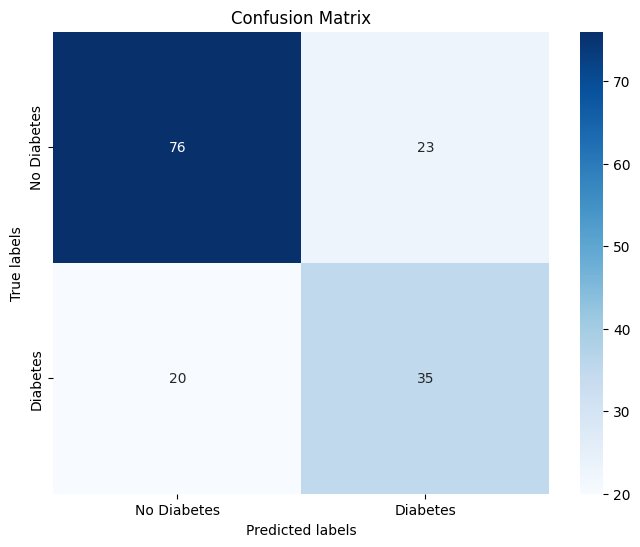

In [ ]:
# Display the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

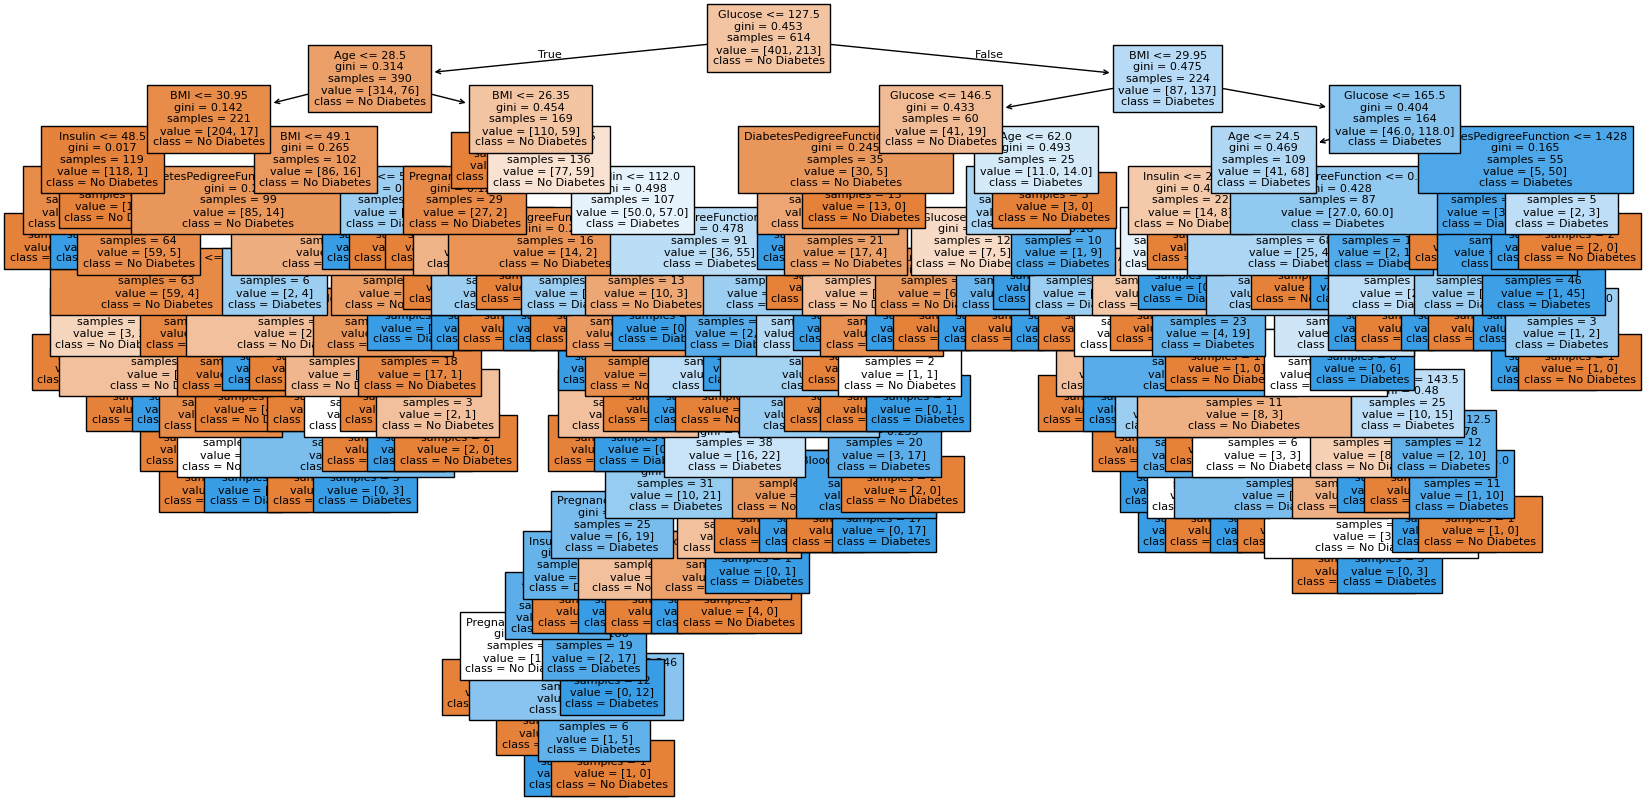

In [ ]:
# 8. Visualization
plt.figure(figsize=(20,10))
tree.plot_tree(model,feature_names=X.columns,class_names=['No Diabetes','Diabetes'],filled = True, fontsize = 8)
plt.show()


***Insights & Stats***

Feature Importance:
                    feature  importance
1                   Glucose    0.357487
5                       BMI    0.164377
7                       Age    0.131524
6  DiabetesPedigreeFunction    0.115416
4                   Insulin    0.087381
2             BloodPressure    0.079928
3             SkinThickness    0.035927
0               Pregnancies    0.027960

Descriptive Statistics of Target Variable:
count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

Distribution of Target Variable:


<ipython-input-12-db9ba513186d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y, palette = 'magma')


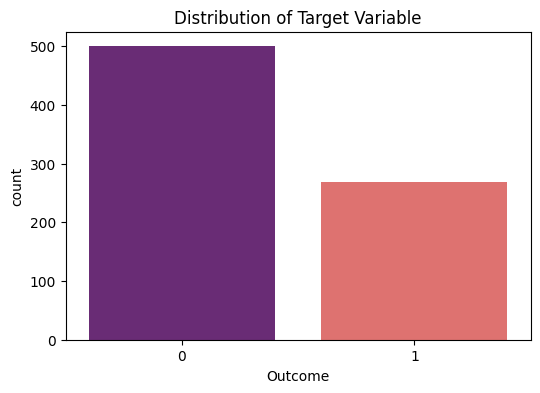


Descriptive Statistics of Numerical Features:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    32.455208                  0.471876   33.240885  
std      6.875177                  0.331329   11.760232  
min     18.200000                  0

In [ ]:
# 9. Insights and Stats
print("\n***Insights & Stats***")

#Feature importance
print("\nFeature Importance:")
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
print(feature_importance.sort_values('importance', ascending=False))

#Descriptive statistics of target variable
print("\nDescriptive Statistics of Target Variable:")
print(y.describe())

#Distribution of target variable
print("\nDistribution of Target Variable:")
plt.figure(figsize=(6,4))
sns.countplot(x = y, palette = 'magma')
plt.title("Distribution of Target Variable")
plt.show()


# Descriptive statistics of numerical features
print("\nDescriptive Statistics of Numerical Features:")
print(X.describe())